# Generate location of microlensing events

- author : Sylvie Dagoret-Campagne
- creation date : November 22 2020


- find density map here:

http://alasky.u-strasbg.fr/footprints/tables/vizier/I_345_gaia2

In [204]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
import healpy as hp 
import numpy as np

In [205]:
file1="MOC-I_345_gaia2-512.fits"
file1="densityMap-I_345_gaia2-64.hpx"
file2="densityMap-I_345_gaia2-128.hpx"

file3="densityMap-I_345_gaia2-256.hpx"
file5="densityMap-I_345_gaia2-1024.hpx"
file4="densityMap-I_345_gaia2-512.hpx"

# densityMap-I_345_gaia2-64.hpx

In [206]:
nside=512
npix=hp.nside2npix(nside)
map = hp.read_map(file4)
imap=map.astype(np.int64)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/Users/dagoret/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


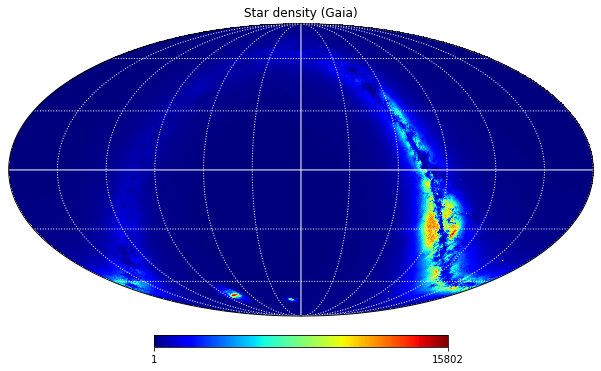

In [207]:
hp.mollview(imap,min=1,title='Star density (Gaia)',cmap="jet",xsize=2000)
hp.graticule(color="w")

# Generate events

In [208]:
density=imap
n_events=1000

In [209]:
# order bins by increasing density
order_idx = np.argsort(density)

In [210]:
# density ordered 
density_sorted=density[order_idx]

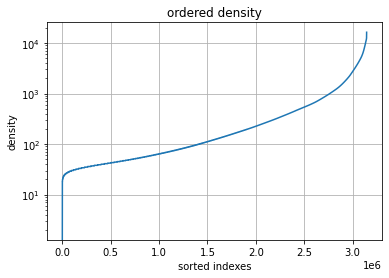

In [211]:
# plot ordered density
plt.plot(density_sorted);
plt.yscale('log')
plt.title("ordered density")
plt.xlabel("sorted indexes")
plt.ylabel("density")
plt.grid()

In [212]:
# computed ordered probability
dist = density_sorted**2
#dist = density   
cumm_dist = np.cumsum(dist)
cumm_dist = cumm_dist/np.max(cumm_dist)
uniform_draw = np.random.uniform(size=n_events)
# selected sorted indexes
sel_sorted_indexes = np.floor(np.interp(uniform_draw, cumm_dist, np.arange(cumm_dist.size)))

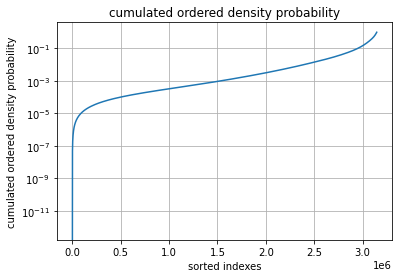

In [213]:
# plot sorted probability
plt.plot(cumm_dist);
plt.yscale('log')
plt.title("cumulated ordered density probability")
plt.xlabel("sorted indexes")
plt.ylabel("cumulated ordered density probability")
plt.grid()

In [214]:
# draw sorted indexes 
uniform_draw = np.random.uniform(size=n_events)
sel_sorted_indexes = np.floor(np.interp(uniform_draw, cumm_dist, np.arange(cumm_dist.size)))

In [215]:
sel_sorted_indexes=sel_sorted_indexes.astype(np.int64)

In [216]:
# retrieve healpy indexes from random drawn indexes 
reorder_indexes=order_idx[sel_sorted_indexes] 

In [217]:
# functions to convert healpix indexes into ra,dec

In [218]:
def IndexToDeclRa(index,nside):
    theta,phi=hp.pixelfunc.pix2ang(nside,index)
    return -np.degrees(theta-np.pi/2.),np.degrees(np.pi*2.-phi)

def DeclRaToIndex(decl,RA,nside):
    return hp.pixelfunc.ang2pix(nside,np.radians(-decl+90.),np.radians(360.-RA))

In [219]:
# for astropy -180 <Ra< 180

In [220]:
all_ra=np.zeros(n_events)
all_dec=np.zeros(n_events)
count=0
for idx in reorder_indexes:
    dec,ra=IndexToDeclRa(idx,nside)
    if ra>180.:
        #all_ra[count]=180-ra
        all_ra[count]=ra-360
    else:
        all_ra[count]=ra
    all_dec[count]=dec
    count+=1

Text(0.5, 1.0, 'declination')

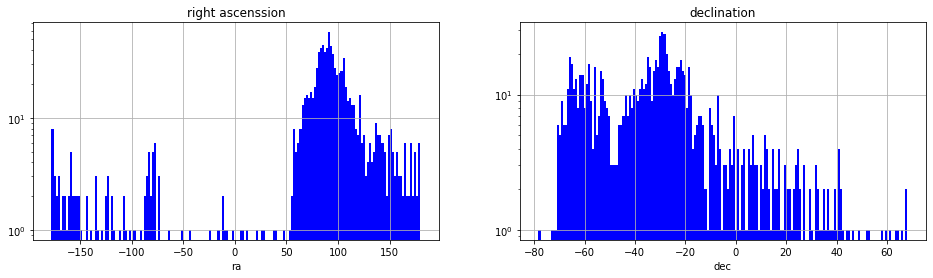

In [221]:
# Plot histogram Ra, Dec
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(121)
ax.hist(all_ra,bins=180,facecolor="b")
ax.set_yscale('log')
ax.grid()
ax.set_xlabel("ra")
ax.set_title("right ascenssion")

ax=fig.add_subplot(122)
ax.hist(all_dec,bins=180,facecolor="b")
ax.set_yscale('log')
ax.grid()
ax.set_xlabel("dec")
ax.set_title("declination")

In [222]:
import astropy.coordinates as coord
from astropy import units as u

the_ra = coord.Angle(all_ra*u.degree)
the_dec = coord.Angle(all_dec*u.degree)

Text(0.5, 1.0, 'simulated events')

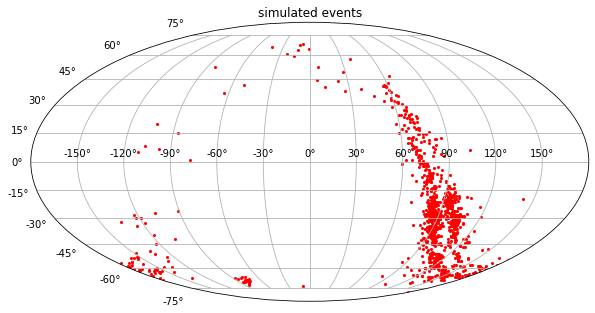

In [226]:
# plot events
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(the_ra.radian, the_dec.radian,marker='.',linewidths=0.1,color="r")
ax.grid()
ax.set_title("simulated events")

Text(0.5, 1.0, 'simulated events')

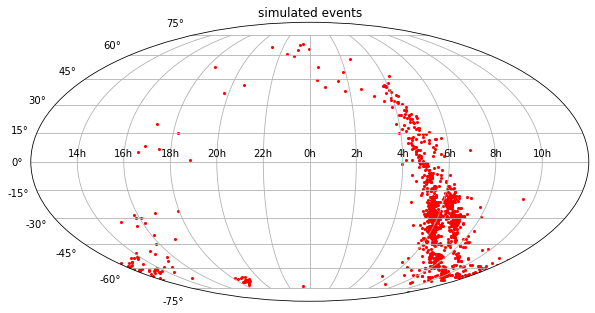

In [225]:
# plot events
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(the_ra.radian, the_dec.radian,marker='.',linewidths=0.1,color="r")
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
ax.set_title("simulated events")
